In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
data_raw = pd.read_csv('data_clean.csv')
data_raw.columns


data_raw = data_raw.drop(['Unnamed: 0'], axis=1)

# remove for validation
data_clean = data_raw[data_raw['Health Status'] != "for validation"]
data_clean=data_clean.reset_index(drop=True)
data_clean.columns

Index(['phcaseno', 'Sex', 'Age', 'Nationality', 'Residence in the Philippines',
       'History of Travel / Exposure', 'Travel History', 'Epi_Link',
       'Date of Onset of Symptoms', 'Date of Admission',
       ...
       'Epi_Link_Exposure', 'disease_len_days', 'geo_address', 'address',
       'Travel History Binary', 'region_inc',
       'average income (in thousand pesos)', 'city', 'region',
       'Population Density'],
      dtype='object', length=118)

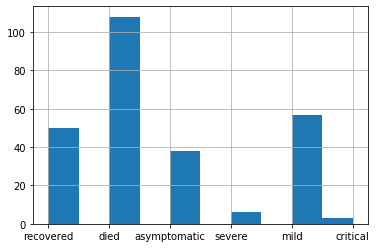

In [5]:
data_clean['Health Status'].hist()

In [6]:
# Sex -  M/F:
data_clean['Sex'] = pd.get_dummies(data_clean['Sex'])
data_clean['Sex'].value_counts() 

0    179
1     83
Name: Sex, dtype: int64

In [7]:
def nationality_recode(series):
    if series != 'filipino':
        return 'other'
    else: 
        return 'filipino'

data_clean['Nationality'] = data_clean['Nationality'].apply(nationality_recode)
data_clean['Nationality'] = pd.get_dummies(data_clean['Nationality'])
data_clean['Nationality'].value_counts() 

1    241
0     21
Name: Nationality, dtype: int64

In [8]:
data_clean['Population Density'] = data_clean.loc[:,'Population Density'].str.replace(',', '').astype(float)

In [9]:
data_clean.columns.tolist()

['phcaseno',
 'Sex',
 'Age',
 'Nationality',
 'Residence in the Philippines',
 'History of Travel / Exposure',
 'Travel History',
 'Epi_Link',
 'Date of Onset of Symptoms',
 'Date of Admission',
 'Date of Lab Confirmation',
 'Date of Announcement to the Public',
 'Admission / Consultation',
 'Symptoms',
 'other_disease',
 'Status',
 'Health Status',
 'Date of Final Status (recovered/expired)',
 'Final Diagnosis',
 'Age Group',
 'Location',
 'Location 1',
 'Location 2',
 'Latitude',
 'Longitude',
 'Residence Lat',
 'Residence Long',
 'symp_ body malaise',
 'symp_ colds',
 'symp_ comorbidity',
 'symp_ cough',
 'symp_ difficulty in breathing',
 'symp_ dizziness',
 'symp_ dysphagia',
 'symp_ headache',
 'symp_ shortness of breath',
 'symp_ sore throat',
 'symp_asymptomatic',
 'symp_cough',
 'symp_difficulty of breathing',
 'symp_dyspnea',
 'symp_fever',
 'symp_sore throat',
 'dis_  diabetes',
 'dis_  renal disease',
 'dis_ acute kidney injury',
 'dis_ asthma',
 'dis_ atherosclerosis',
 'di

In [10]:
data_clean=data_clean.drop(['phcaseno', 'History of Travel / Exposure', 'Travel History', 'Epi_Link', 'Date of Admission', 'Date of Lab Confirmation', 'Date of Admission', 'Symptoms', 'other_disease', 'Status', 'Date of Final Status (recovered/expired)', 'Final Diagnosis', 'Age Group', 'Location', 'Location 1', 'Location 2', 'Latitude', 'Longitude', 'Residence Lat', 'Residence Long', 'disease_len_days'], axis=1)

In [11]:
data_clean.columns.tolist()

['Sex',
 'Age',
 'Nationality',
 'Residence in the Philippines',
 'Date of Onset of Symptoms',
 'Date of Announcement to the Public',
 'Admission / Consultation',
 'Health Status',
 'symp_ body malaise',
 'symp_ colds',
 'symp_ comorbidity',
 'symp_ cough',
 'symp_ difficulty in breathing',
 'symp_ dizziness',
 'symp_ dysphagia',
 'symp_ headache',
 'symp_ shortness of breath',
 'symp_ sore throat',
 'symp_asymptomatic',
 'symp_cough',
 'symp_difficulty of breathing',
 'symp_dyspnea',
 'symp_fever',
 'symp_sore throat',
 'dis_  diabetes',
 'dis_  renal disease',
 'dis_ acute kidney injury',
 'dis_ asthma',
 'dis_ atherosclerosis',
 'dis_ atherosclerotic cardiovascular disease',
 'dis_ benign prostatic hyperplasia',
 'dis_ benign prostatic hypertrophy',
 'dis_ bronchial asthma',
 'dis_ cardiac disease',
 'dis_ cardiac dysrhythmia',
 'dis_ cardiomyopathy',
 'dis_ cardiovascular disease',
 'dis_ cerebrovascular accident infarc',
 'dis_ cerebrovascular disease infarction',
 'dis_ chronic k

In [12]:
data_clean.head()

,Sex,Age,Nationality,Residence in the Philippines,Date of Onset of Symptoms,Date of Announcement to the Public,Admission / Consultation,Health Status,symp_ body malaise,symp_ colds,...,dis_with comorbid (not specified),Epi_Link_Exposure,geo_address,address,Travel History Binary,region_inc,average income (in thousand pesos),city,region,Population Density
0,1,38,0,None,2020-01-21 00:00:00-05:00,2020-01-30 00:00:00-05:00,san lazaro hospital,recovered,0.0,0.0,...,0.0,1,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460,Manila,Metro Manila,71263.0
1,0,44,0,None,2020-01-18 00:00:00-05:00,2020-02-02 00:00:00-05:00,san lazaro hospital,died,0.0,0.0,...,0.0,1,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460,Manila,Metro Manila,71263.0
2,1,60,0,None,2020-01-21 00:00:00-05:00,2020-02-05 00:00:00-05:00,ace medical center,recovered,0.0,0.0,...,0.0,0,"{'public_building': 'Francisco Duque Hall', 'r...","Francisco Duque Hall, Tayuman Street, Santa Cr...",1,NCR,460,Manila,Metro Manila,71263.0
3,0,48,1,Taguig City,2020-03-03 00:00:00-05:00,2020-03-06 00:00:00-05:00,university of the east ramon magsaysay memoria...,recovered,0.0,0.0,...,0.0,1,{'hospital': 'University of the East - Ramon M...,University of the East - Ramon Magsaysay Memor...,1,NCR,460,Galas,Metro Manila,20785.0
4,0,62,1,"Cainta, Rizal",2020-02-25 00:00:00-05:00,2020-03-06 00:00:00-05:00,research institute for tropical medicine,died,0.0,0.0,...,0.0,1,{'hospital': 'Research Institute for Tropical ...,"Research Institute for Tropical Medicine, Corp...",0,NCR,460,Muntinlupa,Metro Manila,12692.0


In [23]:

for i in data_clean.select_dtypes(exclude='number').columns:
    unique_vals=data_clean[i].nunique()
    print(i,  ": ", unique_vals)

Residence in the Philippines :  55
Date of Onset of Symptoms :  41
Date of Announcement to the Public :  30
Admission / Consultation :  54
Health Status :  6
geo_address :  47
address :  46
region_inc :  8
city :  25
region :  8
